In this file, I will be looking at Washington counties and there dispersion of electric vehicles. Will most likely keep modelling from the dataframe formed in washington_ev_pop_history.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
#Reading in ev history by county
df = pd.read_csv('datasets/Electric_Vehicle_Population_Size_History_By_County.csv')

In [4]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,June 30 2020,Pend Oreille,WA,Passenger,7,6,13,9241,9254,0.14
1,July 31 2017,Columbia,WA,Truck,0,0,0,1533,1533,0.00
2,June 30 2017,Okaloosa,FL,Passenger,1,0,1,185,186,0.54
3,December 31 2021,Stafford,VA,Passenger,2,1,3,94,97,3.09
4,March 31 2022,Camden,NJ,Passenger,0,1,1,13,14,7.14


In [5]:
#Filtering so only cars which stayed in Washington will show
df = df[df['State'] == 'WA']

In [6]:
#Changing date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#Sorting from earliest date to latest
df = df.sort_values(by='Date', ascending=True)

In [8]:
df.tail()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
14295,2023-09-30,San Juan,WA,Passenger,647,181,828,13377,14205,5.83
11647,2023-09-30,Garfield,WA,Truck,0,0,0,942,942,0.00
2587,2023-09-30,Lincoln,WA,Passenger,18,22,40,7371,7411,0.54
5488,2023-09-30,Wahkiakum,WA,Truck,4,0,4,1714,1718,0.23
15636,2023-09-30,Chelan,WA,Truck,33,0,33,22380,22413,0.15


In [9]:
df['County'].value_counts()

Jefferson       162
Stevens         162
Benton          162
Grays Harbor    162
Douglas         162
Klickitat       162
Mason           162
Grant           162
Whitman         162
Columbia        162
Thurston        162
Ferry           162
Skagit          162
Pend Oreille    162
Franklin        162
Clallam         162
King            162
San Juan        162
Whatcom         162
Pacific         162
Lincoln         162
Kittitas        162
Clark           162
Spokane         162
Adams           162
Snohomish       162
Kitsap          162
Skamania        162
Cowlitz         162
Pierce          162
Garfield        162
Lewis           162
Okanogan        162
Island          162
Wahkiakum       162
Chelan          162
Asotin          162
Walla Walla     162
Yakima          162
Name: County, dtype: int64

In [18]:
#Going to group so there is no seperation in vehicle counts for a given county
df = df.groupby(['Date', 'County', 'State']).sum().reset_index()

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_29212/1145820782.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Date', 'County', 'State']).sum().reset_index()


In [19]:
df.head()

,Date,County,State,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2017-01-31,Adams,WA,1,1,2,17251,17253,0.02
1,2017-01-31,Asotin,WA,4,3,7,18805,18812,0.06
2,2017-01-31,Benton,WA,129,129,258,167665,167923,0.20
3,2017-01-31,Chelan,WA,54,28,82,73158,73240,0.16
4,2017-01-31,Clallam,WA,73,64,137,69043,69180,0.28


In [21]:
df.tail(35)

,Date,County,State,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
3124,2023-09-30,Clallam,WA,618,299,917,68732,69649,1.94
3125,2023-09-30,Clark,WA,6533,2458,8991,382564,391555,2.99
3126,2023-09-30,Columbia,WA,12,0,12,3882,3894,0.51
3127,2023-09-30,Cowlitz,WA,540,232,772,94658,95430,1.15
3128,2023-09-30,Douglas,WA,229,72,301,40467,40768,1.10
3129,2023-09-30,Ferry,WA,23,3,26,7575,7601,0.62
3130,2023-09-30,Franklin,WA,356,151,507,79915,80422,0.86
3131,2023-09-30,Garfield,WA,0,3,3,2197,2200,0.24
3132,2023-09-30,Grant,WA,332,143,475,91978,92453,0.75
3133,2023-09-30,Grays Harbor,WA,337,206,543,66792,67335,1.17


In [24]:
#Filtering so can get most recent numbers from latest date
latest_dates = df[df['Date'] == '2023-09-30']
latest_dates.head(40)

,Date,County,State,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
3120,2023-09-30,Adams,WA,30,12,42,17686,17728,0.37
3121,2023-09-30,Asotin,WA,39,25,64,18493,18557,0.53
3122,2023-09-30,Benton,WA,1264,589,1853,172393,174246,1.44
3123,2023-09-30,Chelan,WA,701,183,884,74843,75727,1.75
3124,2023-09-30,Clallam,WA,618,299,917,68732,69649,1.94
3125,2023-09-30,Clark,WA,6533,2458,8991,382564,391555,2.99
3126,2023-09-30,Columbia,WA,12,0,12,3882,3894,0.51
3127,2023-09-30,Cowlitz,WA,540,232,772,94658,95430,1.15
3128,2023-09-30,Douglas,WA,229,72,301,40467,40768,1.10
3129,2023-09-30,Ferry,WA,23,3,26,7575,7601,0.62


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Adams'),
  Text(1, 0, 'Asotin'),
  Text(2, 0, 'Benton'),
  Text(3, 0, 'Chelan'),
  Text(4, 0, 'Clallam'),
  Text(5, 0, 'Clark'),
  Text(6, 0, 'Columbia'),
  Text(7, 0, 'Cowlitz'),
  Text(8, 0, 'Douglas'),
  Text(9, 0, 'Ferry'),
  Text(10, 0, 'Franklin'),
  Text(11, 0, 'Garfield'),
  Text(12, 0, 'Grant'),
  Text(13, 0, 'Grays Harbor'),
  Text(14, 0, 'Island'),
  Text(15, 0, 'Jefferson'),
  Text(16, 0, 'King'),
  Text(17, 0, 'Kitsap'),
  Text(18, 0, 'Kittitas'),
  Text(19, 0, 'Klickitat'),
  Text(20, 0, 'Lewis'),
  Text(21, 0, 'Lincoln'),
  Text(22, 0, 'Mason'),
  Text(23, 0, 'Okanogan'),
  Text(24, 0, 'Pacific'),
  Text(25, 0, 'Pend Oreille'),
  Text(26, 0, 'Pierce'),
  Text(27, 0, 'San Juan'),
  Text(28, 0, 'Skagit'),
  Text(29, 0, 'Skamania'),
  Text

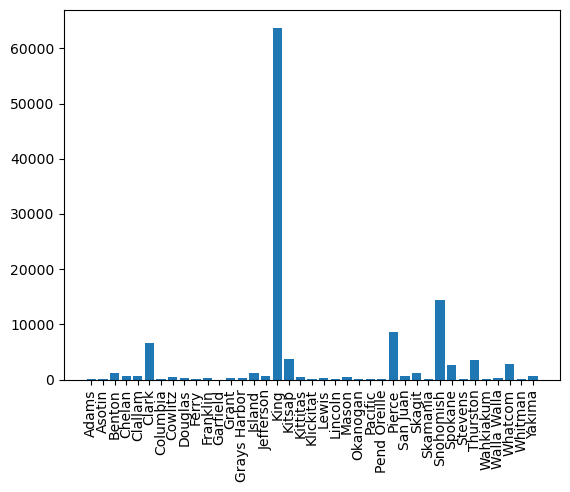

In [26]:
#Plotting BEV's by county
plt.bar(latest_dates['County'], latest_dates['Battery Electric Vehicles (BEVs)'])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Adams'),
  Text(1, 0, 'Asotin'),
  Text(2, 0, 'Benton'),
  Text(3, 0, 'Chelan'),
  Text(4, 0, 'Clallam'),
  Text(5, 0, 'Clark'),
  Text(6, 0, 'Columbia'),
  Text(7, 0, 'Cowlitz'),
  Text(8, 0, 'Douglas'),
  Text(9, 0, 'Ferry'),
  Text(10, 0, 'Franklin'),
  Text(11, 0, 'Garfield'),
  Text(12, 0, 'Grant'),
  Text(13, 0, 'Grays Harbor'),
  Text(14, 0, 'Island'),
  Text(15, 0, 'Jefferson'),
  Text(16, 0, 'King'),
  Text(17, 0, 'Kitsap'),
  Text(18, 0, 'Kittitas'),
  Text(19, 0, 'Klickitat'),
  Text(20, 0, 'Lewis'),
  Text(21, 0, 'Lincoln'),
  Text(22, 0, 'Mason'),
  Text(23, 0, 'Okanogan'),
  Text(24, 0, 'Pacific'),
  Text(25, 0, 'Pend Oreille'),
  Text(26, 0, 'Pierce'),
  Text(27, 0, 'San Juan'),
  Text(28, 0, 'Skagit'),
  Text(29, 0, 'Skamania'),
  Text

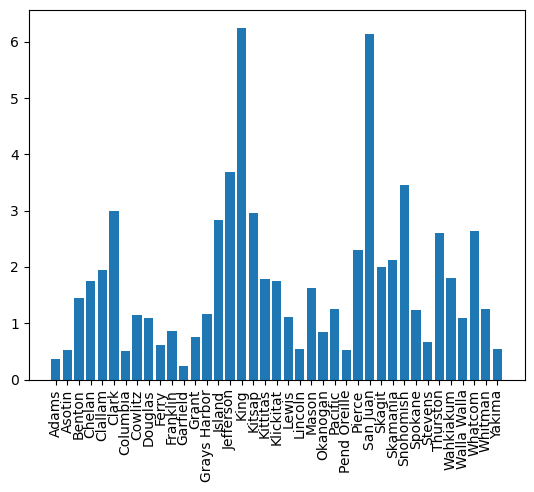

In [27]:
#Plotting % of EV's by county
plt.bar(latest_dates['County'], latest_dates['Percent Electric Vehicles'])
plt.xticks(rotation = 90)